In [1]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///hawaii.sqlite')

In [2]:
from sqlalchemy.ext.automap import automap_base

Base = automap_base()

Base.prepare(engine, reflect=True)

Station = Base.classes.station
Measurement = Base.classes.measurement

In [4]:
from sqlalchemy.orm import Session

session = Session(engine)

In [5]:
import csv

file_path = 'hawaii_measurements.csv'

with open(file_path, 'r') as file:

    csv_reader = csv.reader(file)

    for row in csv_reader:
        print(row)

['station', 'date', 'prcp', 'tobs']
['USC00519397', '2010-01-01', '0.08', '65']
['USC00519397', '2010-01-02', '0', '63']
['USC00519397', '2010-01-03', '0', '74']
['USC00519397', '2010-01-04', '0', '76']
['USC00519397', '2010-01-06', '', '73']
['USC00519397', '2010-01-07', '0.06', '70']
['USC00519397', '2010-01-08', '0', '64']
['USC00519397', '2010-01-09', '0', '68']
['USC00519397', '2010-01-10', '0', '73']
['USC00519397', '2010-01-11', '0.01', '64']
['USC00519397', '2010-01-12', '0', '61']
['USC00519397', '2010-01-14', '0', '66']
['USC00519397', '2010-01-15', '0', '65']
['USC00519397', '2010-01-16', '0', '68']
['USC00519397', '2010-01-17', '0', '64']
['USC00519397', '2010-01-18', '0', '72']
['USC00519397', '2010-01-19', '0', '66']
['USC00519397', '2010-01-20', '0', '66']
['USC00519397', '2010-01-21', '0', '69']
['USC00519397', '2010-01-22', '0', '67']
['USC00519397', '2010-01-23', '0', '67']
['USC00519397', '2010-01-24', '0.01', '71']
['USC00519397', '2010-01-25', '0', '67']
['USC00519

In [7]:
import pandas as pd

df = pd.read_csv('hawaii_measurements.csv')

df['date'] = pd.to_datetime(df['date'])

most_recent_date = df['date'].max()

print("The most recent date in the dataset is:", most_recent_date)


The most recent date in the dataset is: 2017-08-23 00:00:00


In [9]:
import pandas as pd

df = pd.read_csv('hawaii_measurements.csv')
df['date'] = pd.to_datetime(df['date'])

most_recent_date = df['date'].max()

one_year_ago = most_recent_date - pd.DateOffset(months=12)

last_12_months_data = df.loc[df['date'] >= one_year_ago]

print("Data for the previous 12 months:")
print(last_12_months_data)


Data for the previous 12 months:
           station       date  prcp  tobs
2363   USC00519397 2016-08-23  0.00    81
2364   USC00519397 2016-08-24  0.08    79
2365   USC00519397 2016-08-25  0.08    80
2366   USC00519397 2016-08-26  0.00    79
2367   USC00519397 2016-08-27  0.00    77
...            ...        ...   ...   ...
19545  USC00516128 2017-08-19  0.09    71
19546  USC00516128 2017-08-20   NaN    78
19547  USC00516128 2017-08-21  0.56    76
19548  USC00516128 2017-08-22  0.50    76
19549  USC00516128 2017-08-23  0.45    76

[2230 rows x 4 columns]


In [10]:

precipitation_data = last_12_months_data.loc[:, ['date', 'prcp']]

print("Date and Precipitation data for the previous 12 months:")
print(precipitation_data)


Date and Precipitation data for the previous 12 months:
            date  prcp
2363  2016-08-23  0.00
2364  2016-08-24  0.08
2365  2016-08-25  0.08
2366  2016-08-26  0.00
2367  2016-08-27  0.00
...          ...   ...
19545 2017-08-19  0.09
19546 2017-08-20   NaN
19547 2017-08-21  0.56
19548 2017-08-22  0.50
19549 2017-08-23  0.45

[2230 rows x 2 columns]


In [14]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine('sqlite:///hawaii.sqlite')
sql_query = "SELECT date, prcp FROM measurement WHERE date >= :one_year_ago"

one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')
query_result = engine.execute(sql_query, one_year_ago=one_year_ago_str)

precipitation_data = pd.DataFrame(query_result, columns=['date', 'prcp'])

print("Date and Precipitation data for the previous 12 months:")
print(precipitation_data)


Date and Precipitation data for the previous 12 months:
            date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns]


In [16]:

precipitation_data_sorted = precipitation_data.sort_values(by='date')

print("Date and Precipitation data sorted by date:")
print(precipitation_data_sorted)


Date and Precipitation data sorted by date:
            date  prcp
0     2016-08-23  0.00
1009  2016-08-23   NaN
1529  2016-08-23  1.79
704   2016-08-23  0.05
361   2016-08-23  0.15
...          ...   ...
1527  2017-08-22  0.00
1008  2017-08-23  0.00
360   2017-08-23  0.00
1528  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]


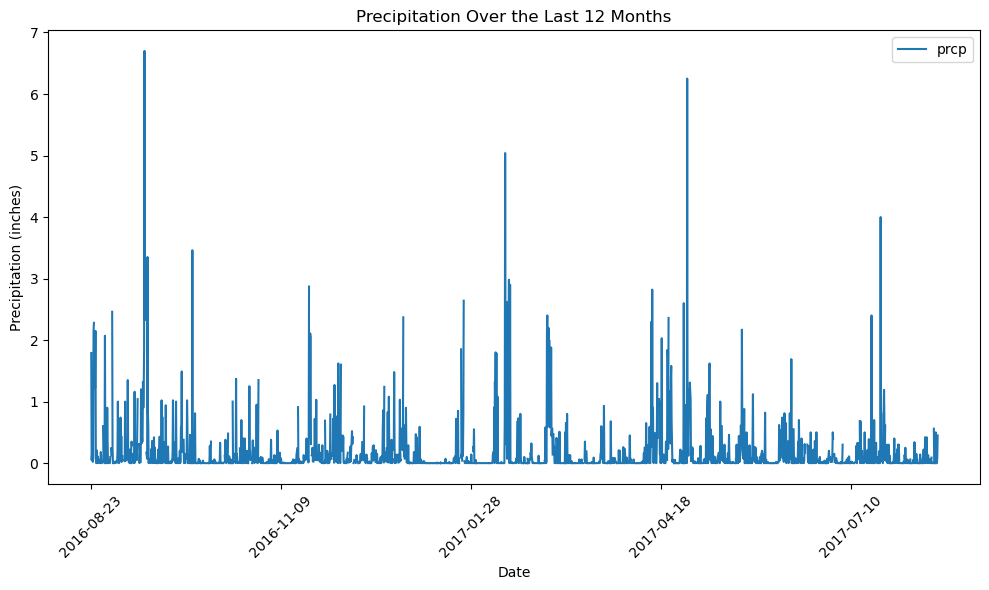

In [17]:
import matplotlib.pyplot as plt

precipitation_data_sorted.plot(x='date', y='prcp', figsize=(10,6))
plt.title('Precipitation Over the Last 12 Months')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [19]:

print("Summary statistics for precipitation data:")
print(precipitation_data_sorted.describe())


Summary statistics for precipitation data:
              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [21]:
import pandas as pd

file_path = 'hawaii_stations.csv'

stations_df = pd.read_csv(file_path)
print("Contents of the hawaii_stations.csv file:")
print(stations_df)


Contents of the hawaii_stations.csv file:
       station                                    name  latitude  longitude  \
0  USC00519397                    WAIKIKI 717.2, HI US  21.27160 -157.81680   
1  USC00513117                    KANEOHE 838.1, HI US  21.42340 -157.80150   
2  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130 -157.83740   
3  USC00517948                       PEARL CITY, HI US  21.39340 -157.97510   
4  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920 -158.01110   
5  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556 -157.71139   
6  USC00519281                     WAIHEE 837.5, HI US  21.45167 -157.84889   
7  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520 -157.99920   
8  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310 -157.80250   

   elevation  
0        3.0  
1       14.6  
2        7.0  
3       11.9  
4      306.6  
5       19.5  
6       32.9  
7        0.9  
8      152.4  


In [24]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///hawaii.sqlite')
query_total_stations = """
SELECT COUNT(DISTINCT station) AS total_stations
FROM measurement;
"""

query_most_active_stations = """
SELECT station, COUNT(*) AS observation_count
FROM measurement
GROUP BY station
ORDER BY observation_count DESC;
"""

total_stations_result = pd.read_sql(query_total_stations, engine)
most_active_stations_result = pd.read_sql(query_most_active_stations, engine)

print("Total number of stations:", total_stations_result['total_stations'][0])

print("\nMost-active stations:")
print(most_active_stations_result)


Total number of stations: 9

Most-active stations:
       station  observation_count
0  USC00519281               2772
1  USC00519397               2724
2  USC00513117               2709
3  USC00519523               2669
4  USC00516128               2612
5  USC00514830               2202
6  USC00511918               1979
7  USC00517948               1372
8  USC00518838                511


In [25]:

station_with_most_observations = most_active_stations_result['station'][0]

print("Station ID with the greatest number of observations:", station_with_most_observations)


Station ID with the greatest number of observations: USC00519281


In [28]:
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('sqlite:///hawaii.sqlite')

most_active_station_id = most_active_stations_result['station'][0]

query_temperatures = f"""
SELECT 
    MIN(tobs) AS min_temperature,
    MAX(tobs) AS max_temperature,
    AVG(tobs) AS avg_temperature
FROM 
    measurement
WHERE 
    station = '{most_active_station_id}';
"""
temperatures_result = pd.read_sql(query_temperatures, engine)
print("Temperatures for the most-active station:")
print(temperatures_result)


Temperatures for the most-active station:
   min_temperature  max_temperature  avg_temperature
0             54.0             85.0        71.663781


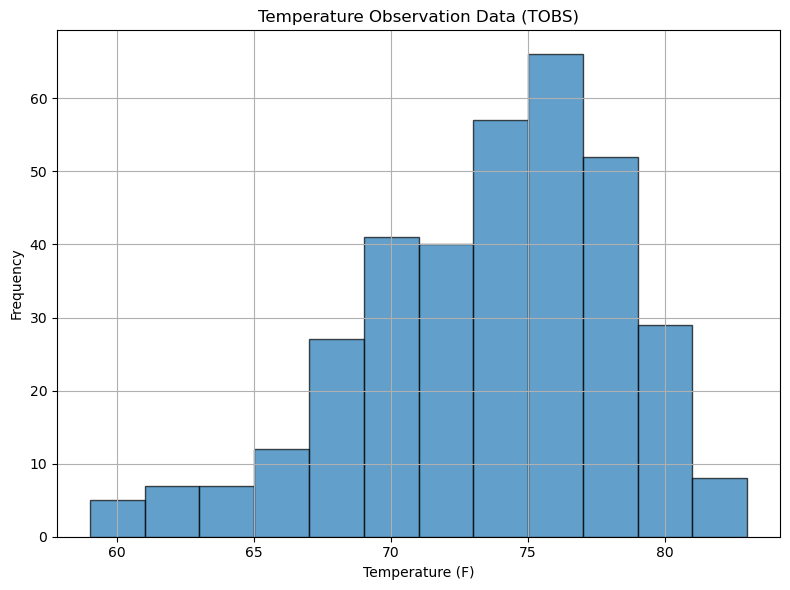

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

engine = create_engine('sqlite:///hawaii.sqlite')

most_active_station_id = most_active_stations_result['station'][0]

end_date = most_recent_date
start_date = end_date - pd.DateOffset(months=12)

query_tobs = f"""
SELECT tobs
FROM measurement
WHERE station = '{most_active_station_id}'
    AND date >= '{start_date}'
    AND date <= '{end_date}';
"""

tobs_data = pd.read_sql(query_tobs, engine)

plt.figure(figsize=(8, 6))
plt.hist(tobs_data['tobs'], bins=12, edgecolor='black', alpha=0.7)
plt.title('Temperature Observation Data (TOBS)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
from flask import Flask, jsonify
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime

app = Flask(__name__)

db_path = "sqlite:///hawaii.sqlite"

def connect_to_db():
    engine = create_engine(db_path)
    return engine
@app.route('/')
def home():
    return '''
    <h1>Welcome to Climate Analysis API</h1>
    <p>Available Routes:</p>
    <ul>
        <li><a href="/api/v1.0/precipitation">/api/v1.0/precipitation</a>: Precipitation data for the last year</li>
        <li><a href="/api/v1.0/stations">/api/v1.0/stations</a>: List of weather stations</li>
        <li><a href="/api/v1.0/tobs">/api/v1.0/tobs</a>: Temperature observations for the last year</li>
        <li>/api/v1.0/start_date (Replace start_date with a date in the format YYYY-MM-DD): Min, Avg, Max temperature for a given start date</li>
        <li>/api/v1.0/start_date/end_date (Replace start_date and end_date with dates in the format YYYY-MM-DD): Min, Avg, Max temperature for a given date range</li>
    </ul>
    '''

@app.route('/api/v1.0/precipitation')
def precipitation():
    engine = connect_to_db()
    df = pd.read_sql("SELECT date, prcp FROM measurement WHERE date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)", engine)
    
    # Convert DataFrame to dictionary with date as key and precipitation as value
    precipitation_dict = df.set_index('date')['prcp'].to_dict()
    
    return jsonify(precipitation_dict)


@app.route('/api/v1.0/stations')
def stations():
    engine = connect_to_db()
    stations = pd.read_sql("SELECT station, name FROM station", engine)
    station_list = stations.to_dict(orient='records')
    return jsonify(station_list)


@app.route('/api/v1.0/tobs')
def tobs():
    engine = connect_to_db()
    most_recent_date = pd.read_sql("SELECT MAX(date) FROM measurement", engine).iloc[0,0]
    one_year_ago = datetime.strptime(most_recent_date, '%Y-%m-%d') - pd.DateOffset(years=1)
    tobs_data = pd.read_sql(f"SELECT date, tobs FROM measurement WHERE date >= '{one_year_ago}'", engine)
    tobs_list = tobs_data.to_dict(orient='records')
    return jsonify(tobs_list)
    

@app.route('/api/v1.0/<start_date>')
def temp_start(start_date):
    engine = connect_to_db()
    temp_stats = pd.read_sql(f"SELECT MIN(tobs) AS min_temp, MAX(tobs) AS max_temp, AVG(tobs) AS avg_temp FROM measurement WHERE date >= '{start_date}'", engine)
    temp_stats_dict = temp_stats.to_dict(orient='records')
    return jsonify(temp_stats_dict)



@app.route('/api/v1.0/<start_date>/<end_date>')
def temp_range(start_date, end_date):
    engine = connect_to_db()
    temp_stats = pd.read_sql(f"SELECT MIN(tobs) AS min_temp, MAX(tobs) AS max_temp, AVG(tobs) AS avg_temp FROM measurement WHERE date BETWEEN '{start_date}' AND '{end_date}'", engine)
    temp_stats_dict = temp_stats.to_dict(orient='records')
    return jsonify(temp_stats_dict)



if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 7, in <module>
    from .connect import *
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 12, in <module>
    import jupyter_client
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 3, in <module>
    from .asynchronous import AsyncKernelClient
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchro

SystemExit: 1

In [3]:
from flask import Flask, jsonify
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime

app = Flask(__name__)


db_path = "sqlite:///hawaii.sqlite"

def connect_to_db():
    engine = create_engine(db_path)
    return engine

@app.route('/api/v1.0/stations')
def get_stations():
    engine = connect_to_db()
    stations = pd.read_sql("SELECT station, name FROM station", engine)
    station_list = stations.to_dict(orient='records')
    return jsonify(station_list)

@app.route('/api/v1.0/tobs')
def get_tobs():
    engine = connect_to_db()
    most_active_station = pd.read_sql("SELECT station FROM measurement GROUP BY station ORDER BY COUNT(*) DESC LIMIT 1", engine).iloc[0, 0]
    most_recent_date = pd.read_sql("SELECT MAX(date) FROM measurement", engine).iloc[0,0]
    one_year_ago = datetime.strptime(most_recent_date, '%Y-%m-%d') - pd.DateOffset(years=1)
    tobs_data = pd.read_sql(f"SELECT date, tobs FROM measurement WHERE station = '{most_active_station}' AND date >= '{one_year_ago}'", engine)
    tobs_list = tobs_data.to_dict(orient='records')
    return jsonify(tobs_list)

@app.route('/api/v1.0/<start>')
@app.route('/api/v1.0/<start>/<end>')
def get_temp_stats(start, end=None):
    engine = connect_to_db()
    if end:
        temp_stats = pd.read_sql(f"SELECT MIN(tobs) AS min_temp, AVG(tobs) AS avg_temp, MAX(tobs) AS max_temp FROM measurement WHERE date BETWEEN '{start}' AND '{end}'", engine)
    else:
        temp_stats = pd.read_sql(f"SELECT MIN(tobs) AS min_temp, AVG(tobs) AS avg_temp, MAX(tobs) AS max_temp FROM measurement WHERE date >= '{start}'", engine)
    temp_stats_dict = temp_stats.to_dict(orient='records')
    return jsonify(temp_stats_dict)


if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 7, in <module>
    from .connect import *
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 12, in <module>
    import jupyter_client
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 3, in <module>
    from .asynchronous import AsyncKernelClient
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sheyma/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchro

SystemExit: 1